In [2]:
CODE_REPO_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/analysis/'

import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import sys
import os

import pandas as pd
import scipy as sc
import numpy as np

sys.path.insert(0, CODE_REPO_PATH)
import read_data as rd
import analysis_plot as ap
import functions as fc
import fc2_stim as fc2_stim

import astropy.stats.circstats as astropy_circstats

%config InlineBackend.figure_format = 'retina'

In [3]:
DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/data/'
FIGURE_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/Figures/pdf_and_png/'
SOURCE_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/source_data/'
save_figure=False
save_source_data=False

### Load CsChrimson and no CsChrimson recordings 

In [4]:
reload(fc2_stim)
genotypes=fc2_stim.load_data(DATA_PATH,reprocess=False)

### Get stimulation phase and subtract FC2 phase offset

In [5]:
reload(fc2_stim)
for genotype,recs in genotypes.items():
    recs=fc2_stim.extra_pre_processing(recs)

### Get stimulation trials

In [6]:
reload(fc2_stim)
abf_trials_df,im_trials_df = fc2_stim.get_photostim_trials(genotypes)

### Get summary of trials

In [7]:
reload(fc2_stim)
summary_abf_trials_df,summary_im_trials_df=fc2_stim.get_summary_df(abf_trials_df,im_trials_df)

In [8]:
print('Fraction of trials with no walking:',
    np.sum(np.isnan(summary_abf_trials_df['mean_xstim_during']))/len(summary_abf_trials_df['mean_xstim_during']))

Fraction of trials with no walking: 0.01702127659574468


In [9]:
reload(fc2_stim)
diff_df=fc2_stim.get_diff_df(summary_im_trials_df)

### Probability distribution of A-B differences in stimulation locations (ED Fig. 4 e)

186.56170522302372 diff. in stim. positions for CsChrimson flie
195.0593451081787 diff. in stim. positions for no CsChrimson flie


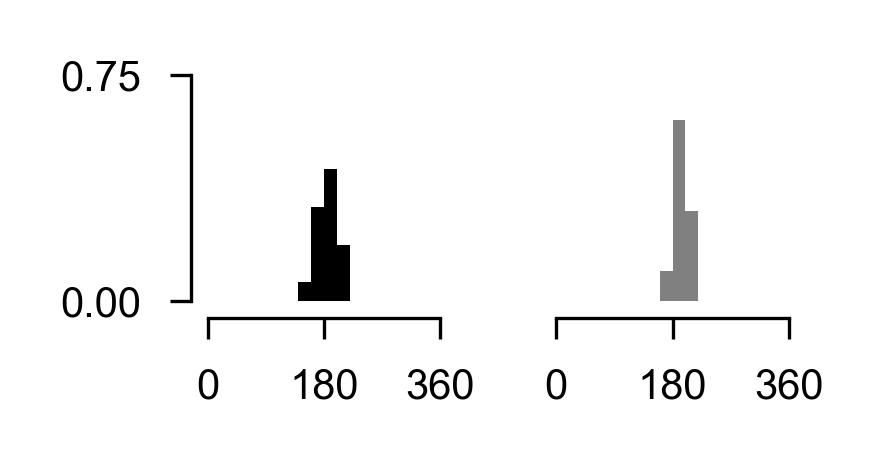

In [10]:
reload(fc2_stim)
fc2_stim.plot_stim_diff_hist(diff_df,
                             save=save_figure,
                             savepath=FIGURE_PATH,
                            fname='ED_Fig_4e.pdf')

### Probability distribution of A-B differences in FC2 phase during stimulation (ED Fig. 4f)

153.75727493860805 diff. in phase positions during stim. for CsChrimson flie
350.695112332024 diff. in phase positions during stim. for CsChrimson flie


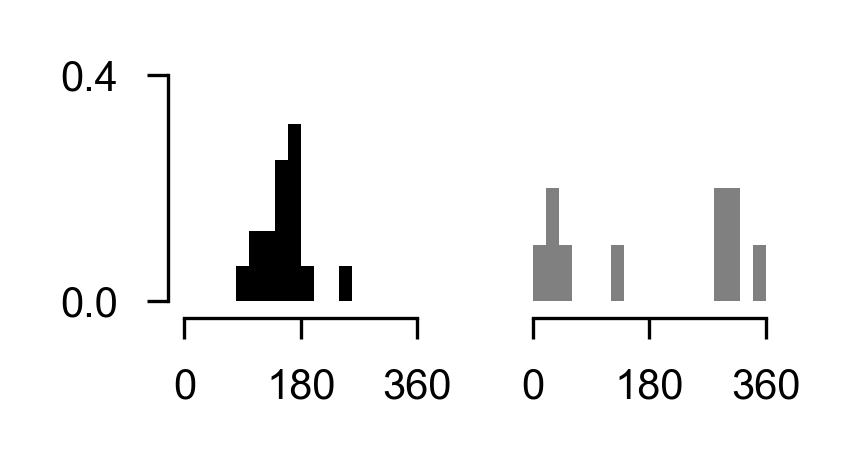

In [11]:
reload(fc2_stim)
fc2_stim.plot_phase_diff_hist(diff_df,
                              save=save_figure,
                              savepath=FIGURE_PATH,
                             fname='ED_Fig_4f.pdf')

### A-B difference in heading angle during stimulation (Fig. 2g)

In [12]:
reload(fc2_stim)
genotype_mean_head_diff= fc2_stim.get_genotype_mean_head_diff(diff_df,
                                                              save=save_source_data,
                                                             savepath=SOURCE_DATA_PATH,
                                                             fname='Fig_2g.csv')

In [13]:
reload(fc2_stim)
mu_deg_chr,mu_deg_ctl=fc2_stim.get_heading_diff_stats(diff_df)

Expected diff for CsChrimson: -173.4382947769763
Actual diff for CsChrimson: 165.91697886343923
p-val: 0.0014877514420903167
Expected diff for CsChrimson: -164.94065489182128
Actual diff for CsChrimson: 19.97014807367134
p-val: 0.9253533924911034


Total flies:
 genotype
VT065306-AD-VT029306-DBD-sytGC7f        10
VT065306-AD-VT029306-DBD-sytGC7f-Chr    16
dtype: int64


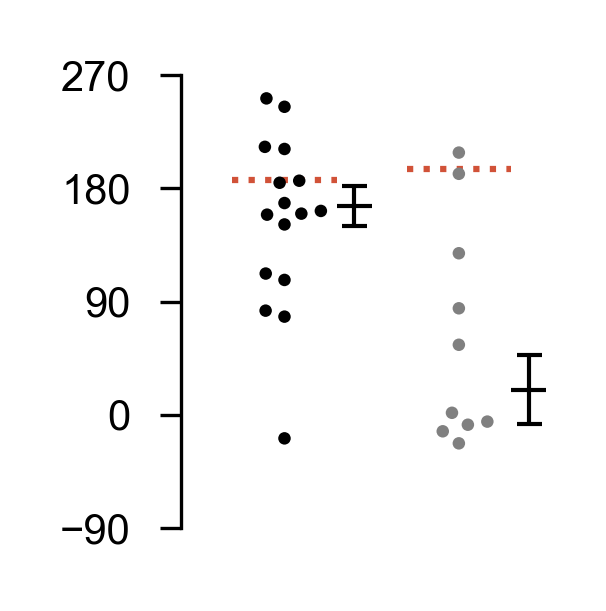

In [37]:
reload(fc2_stim)
fc2_stim.plot_head_diff_scatter(diff_df,genotype_mean_head_diff,mu_deg_chr,mu_deg_ctl,
                               save=save_figure,
                              savepath=FIGURE_PATH,
                               fname='Fig_2g.pdf')

### FC2 phase position vs. heading during stimulation for  CsChrimson flies, plotted separately (ED Fig. 4g)

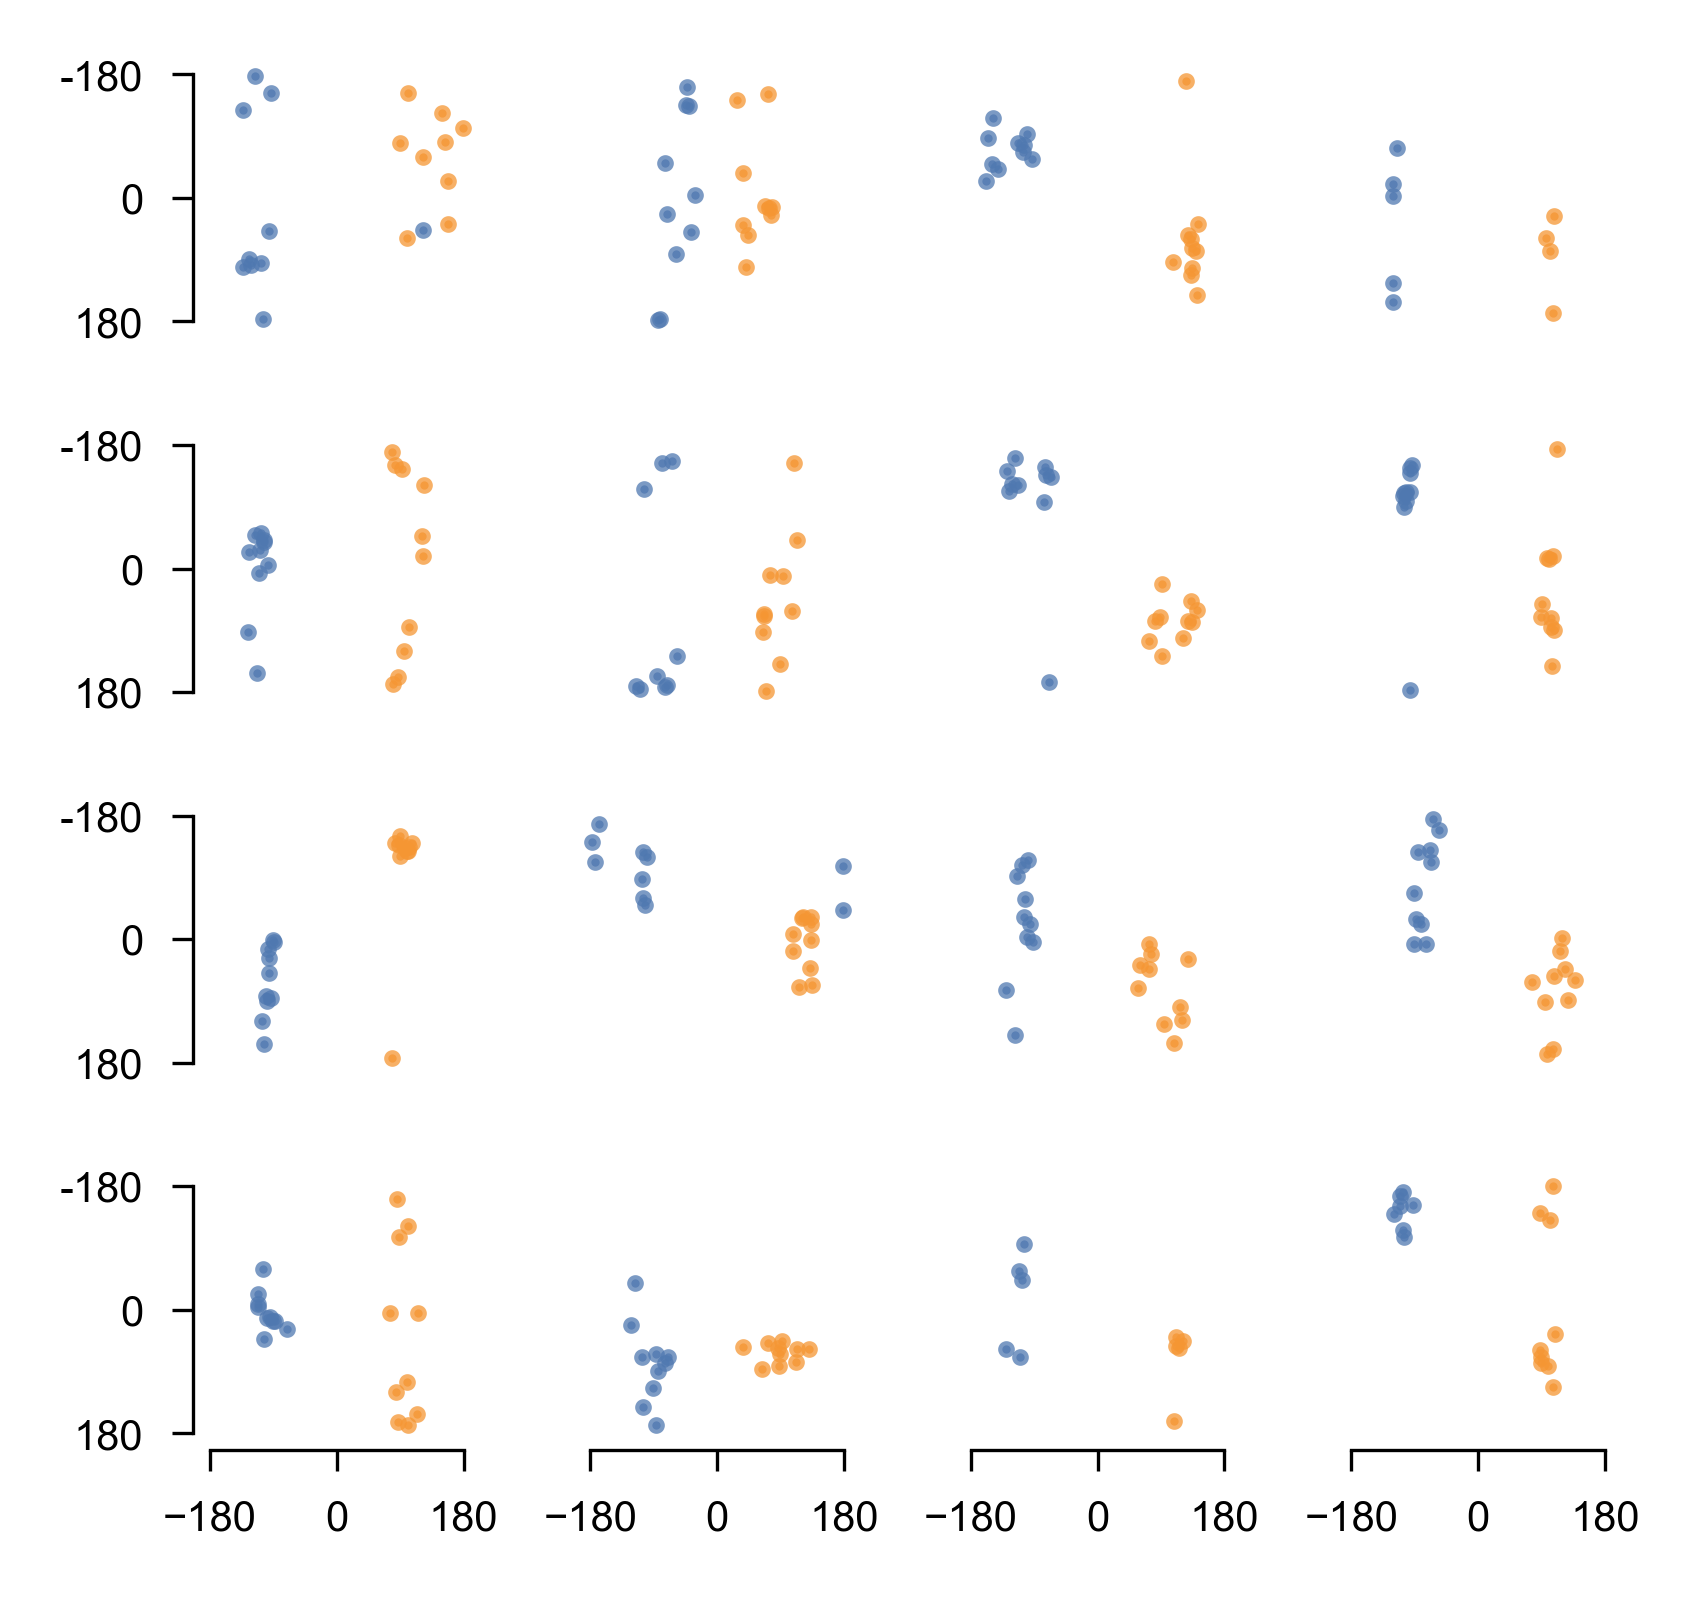

In [38]:
reload(fc2_stim)
fc2_stim.plot_phase_vs_xtim_chr(summary_im_trials_df,
                                save=save_figure,
                                savepath=FIGURE_PATH,
                                fname='ED_Fig_4g.pdf')

### FC2 phase position vs. heading during stimulation for  CsChrimson flies and no CsChrimson flies (ED Fig. 4h)

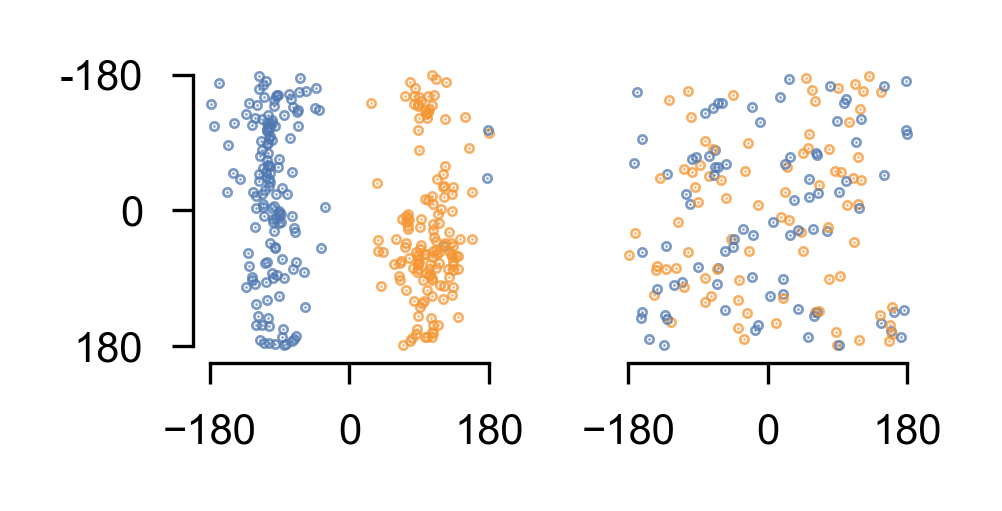

In [39]:
reload(fc2_stim)
fc2_stim.plot_phase_vs_xstim_all_flies(summary_im_trials_df,
                                       save_figure=save_figure,
                                       save_figure_path=FIGURE_PATH,
                                       figure_fname='ED_Fig_4h.pdf',
                                       save_source_data=save_source_data,
                                       save_source_data_path=SOURCE_DATA_PATH,
                                       source_data_fname='ED_Fig_4h.csv')

### Probability distribution of zeroed heading for all CsChrimson flies and no CsChrimson flies (Fig. 2f)

In [40]:
reload(fc2_stim)
zeroed_heading_hist_df=fc2_stim.get_zeroed_heading_hist_df(abf_trials_df)

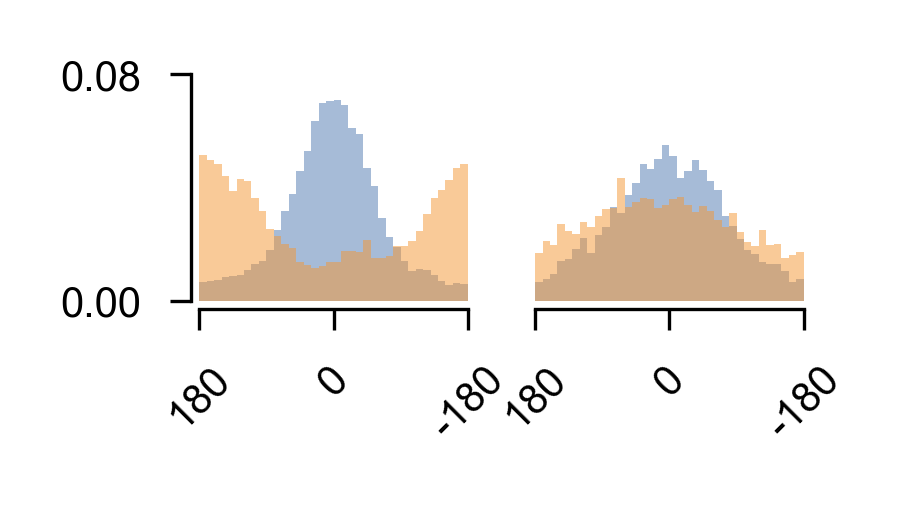

In [41]:
reload(fc2_stim)
fc2_stim.plot_zeroed_heading_hist(zeroed_heading_hist_df,
                               save=save_figure,
                               savepath=FIGURE_PATH,
                                 fname='Fig_2f.pdf')

### First 10 CsChrimson flies and no CsChrimson flies, plotted separately (Fig. 2e)

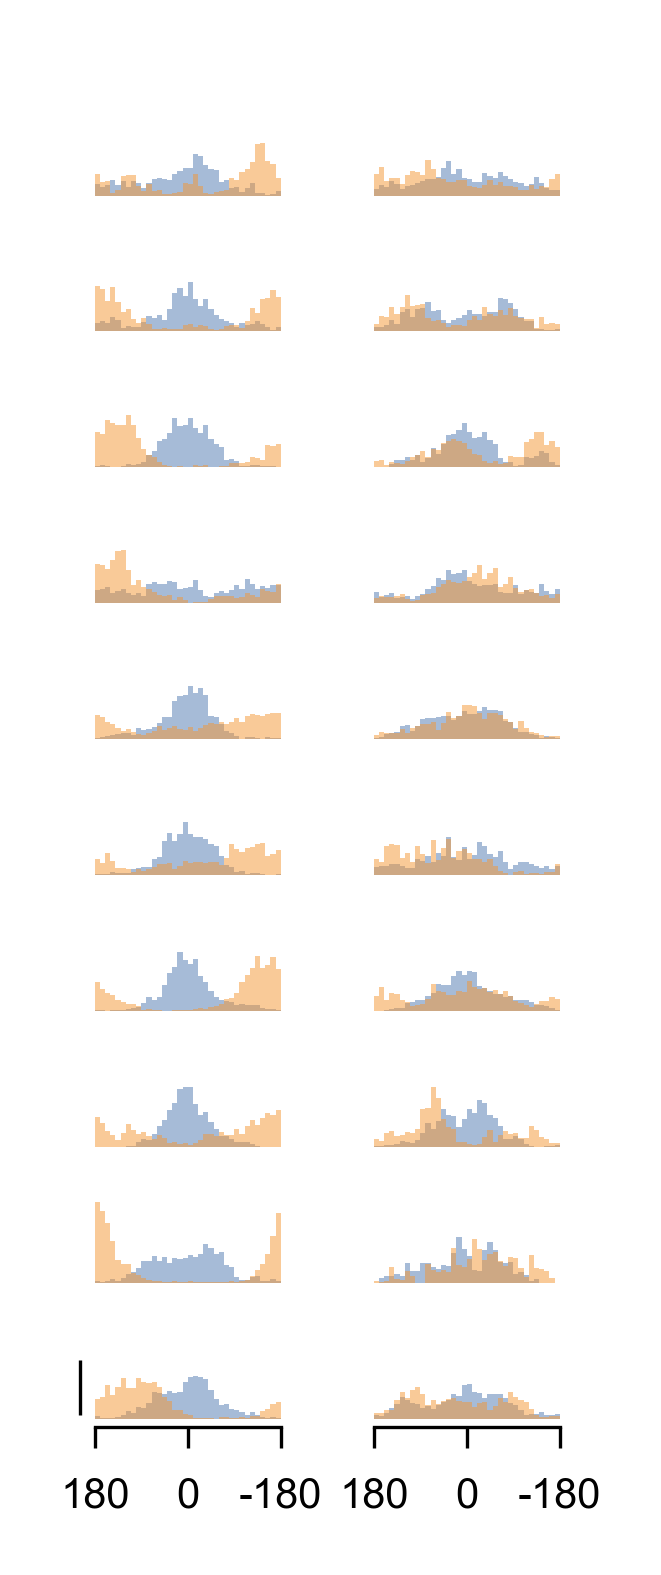

In [42]:
reload(fc2_stim)
fc2_stim.plot_zeroed_heading_hist_example_flies(abf_trials_df,
                               save=save_figure,
                               savepath=FIGURE_PATH,
                               fname='Fig_2e.pdf')

### Example trajectories
CsChrimson: Fig. 2c

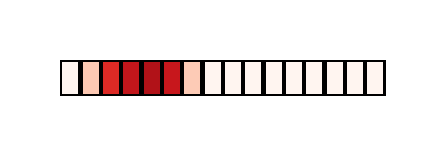

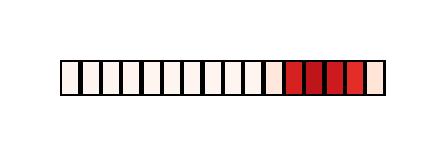

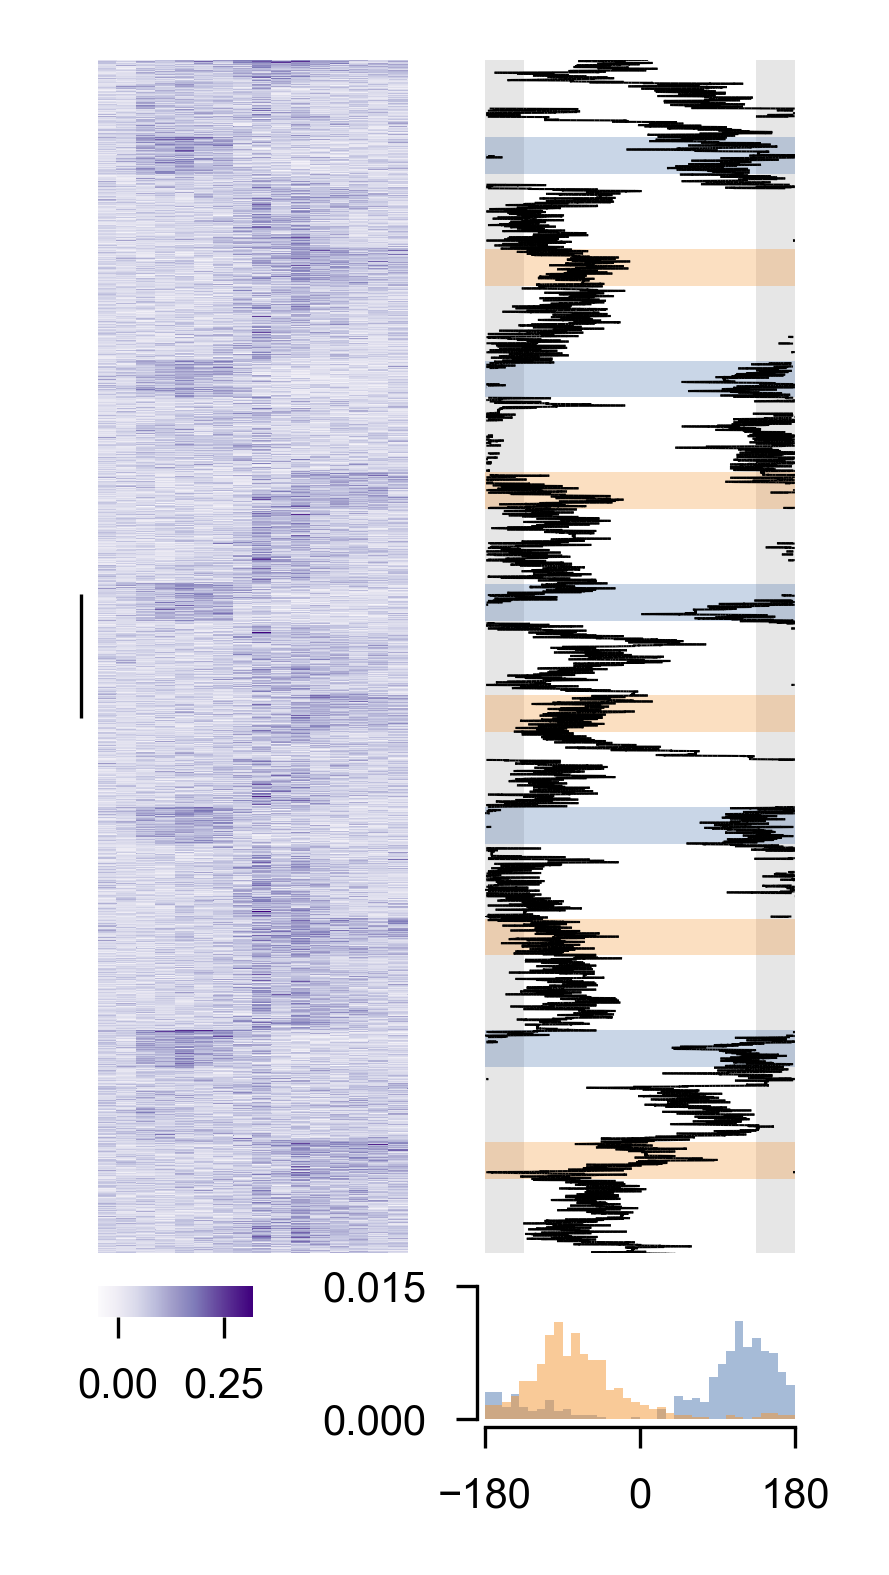

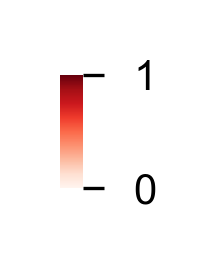

In [43]:
reload(fc2_stim)
fc2_stim.plot_example_trace(genotypes['VT065306-AD-VT029306-DBD-sytGC7f-Chr'],'2022_02_08_0002',im_trials_df,summary_im_trials_df,
                               save=save_figure,
                              savepath=FIGURE_PATH,
                              fname='Fig_2c')

No CsChrimson: Fig. 2f

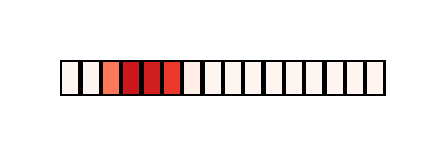

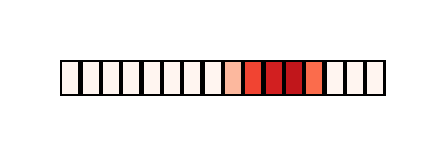

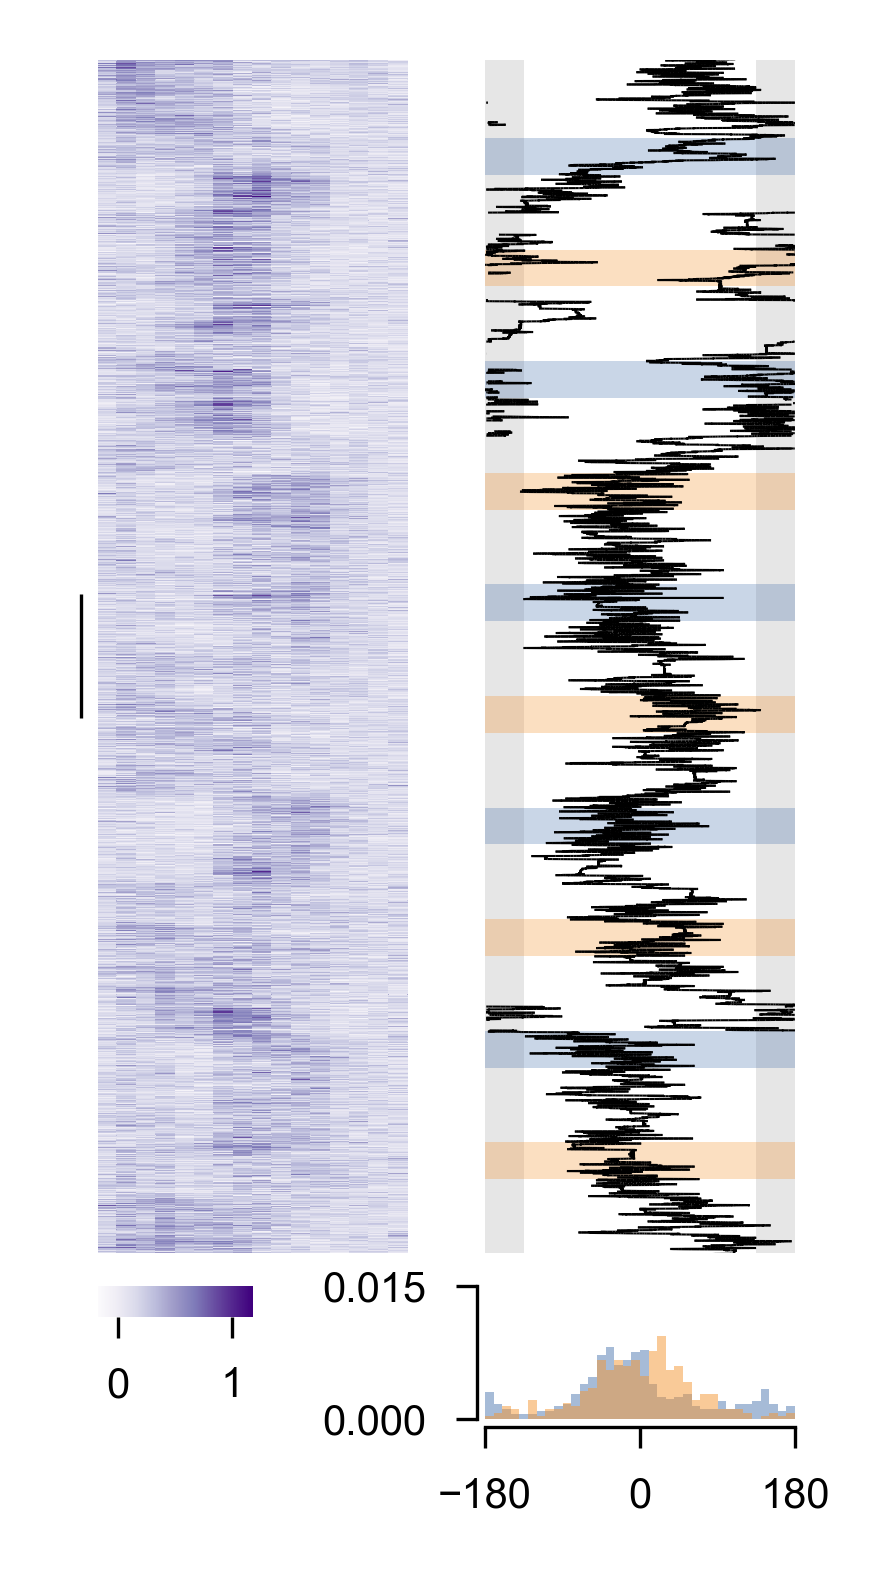

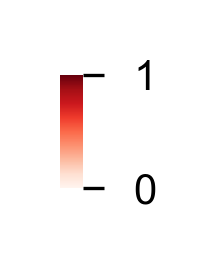

In [47]:
reload(fc2_stim)
fc2_stim.plot_example_trace(genotypes['VT065306-AD-VT029306-DBD-sytGC7f'],'2022_02_07_0013',im_trials_df,summary_im_trials_df,  
                            save=save_figure,
                              savepath=FIGURE_PATH,
                              fname='Fig_2d')

### Example raw fluorescence

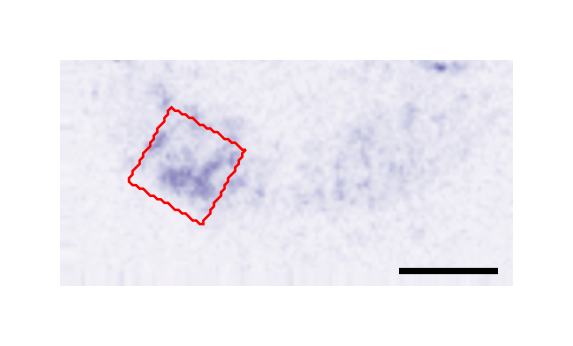

In [44]:
reload(fc2_stim)
fc2_stim.plot_example_avg_proj(DATA_PATH,genotypes['VT065306-AD-VT029306-DBD-sytGC7f-Chr'],207,307,col='col1',scalebar=True,
                              save=save_figure,
                              savepath=FIGURE_PATH,
                              fname='ED_Fig_4b_col_1')

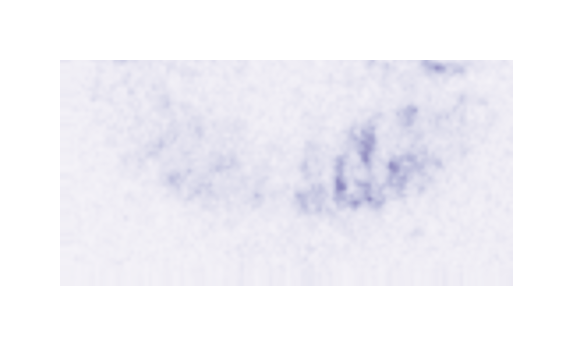

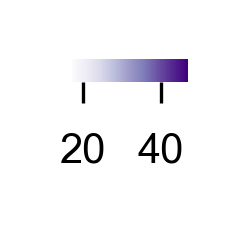

In [45]:
reload(fc2_stim)
fc2_stim.plot_example_avg_proj(DATA_PATH,genotypes['VT065306-AD-VT029306-DBD-sytGC7f-Chr'],308,505,col=None,colorbar=True, save=save_figure,
                              savepath=FIGURE_PATH,
                              fname='ED_Fig_4b_inter')

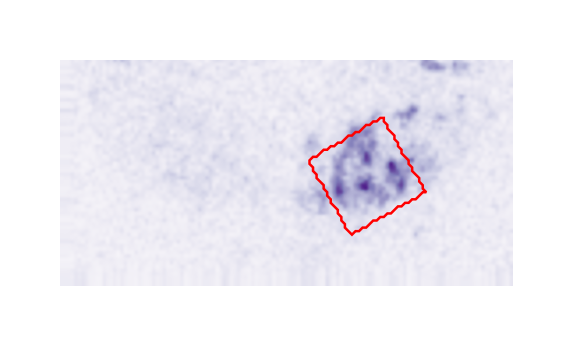

In [46]:
reload(fc2_stim)
fc2_stim.plot_example_avg_proj(DATA_PATH,genotypes['VT065306-AD-VT029306-DBD-sytGC7f-Chr'],506,605,col='col2', save=save_figure,
                              savepath=FIGURE_PATH,
                              fname='ED_Fig_4b_col_2')

### ΔF/F0 for stim and non stim ROIs (ED Fig. 4c)

In [48]:
reload(fc2_stim)
roi_df=fc2_stim.get_roi_df(im_trials_df)
in_vs_out_stim_df =fc2_stim.get_in_vs_out_stim_df(roi_df)

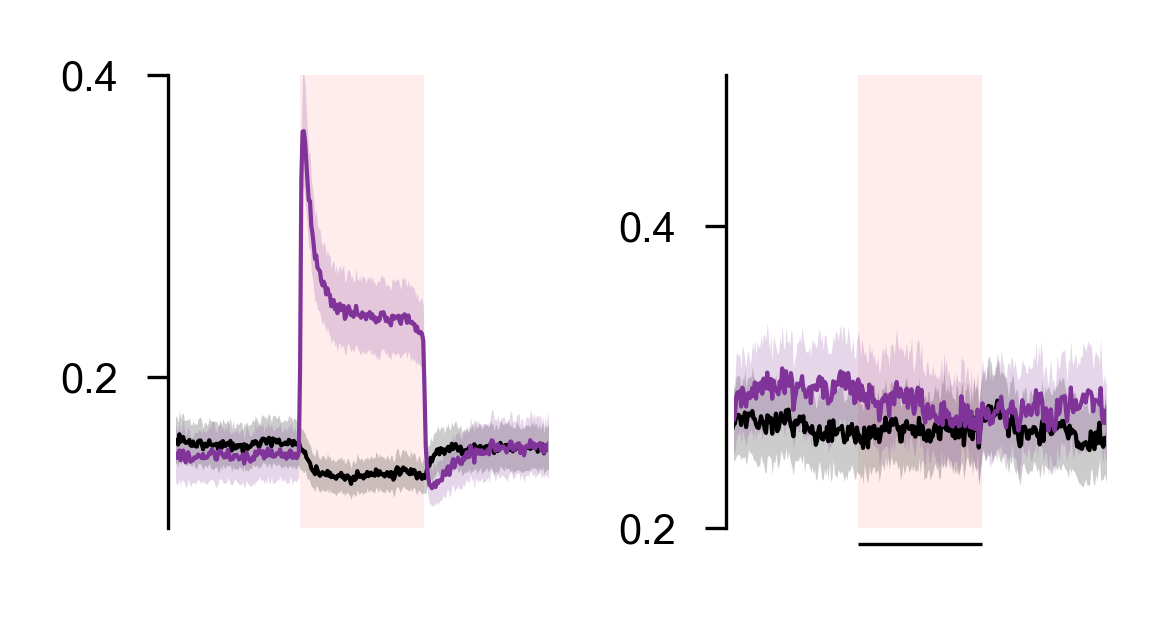

In [49]:
fc2_stim.plot_in_vs_out_stim(in_vs_out_stim_df,
                             save=save_figure,
                             savepath=FIGURE_PATH,
                            fname='ED_Fig_4c.pdf')

### Change in ΔF/F0 for non stim ROIs as a fucntion of distance to stimulation location (ED Fig. 4d)

In [50]:
reload(fc2_stim)
dist_to_stim_mean_df,dist_to_stim_fly_df=fc2_stim.get_dist_to_stim_df(roi_df,
                                                                      save=save_source_data,
                                                                     savepath=SOURCE_DATA_PATH,
                                                                     fname='ED_Fig_4d.csv')

16 flies


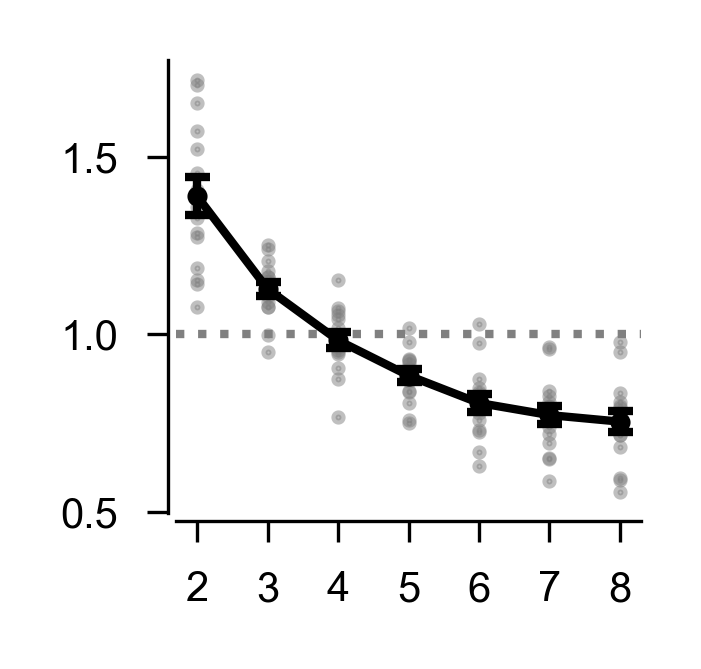

In [51]:
reload(fc2_stim)
fc2_stim.plot_dist_to_stim_change(dist_to_stim_mean_df,dist_to_stim_fly_df,
                                  save=save_figure,
                                  savepath=FIGURE_PATH,
                                 fname='ED_Fig_4d.pdf')

### Forward walking velocity vs. distance to stimulation defined goal heading (ED Fig. 4k)

In [52]:
reload(fc2_stim)
# get stimulation-defined goal heading
abf_trials_df=fc2_stim.get_distance_to_target_heading_vals(abf_trials_df,diff_df)

In [53]:
reload(fc2_stim)
dforw_mean_df=fc2_stim.get_dforw_vs_dist_df(abf_trials_df,
                                           save=save_source_data,
                                           savepath=SOURCE_DATA_PATH,
                                           fname='ED_Fig_4k.csv')

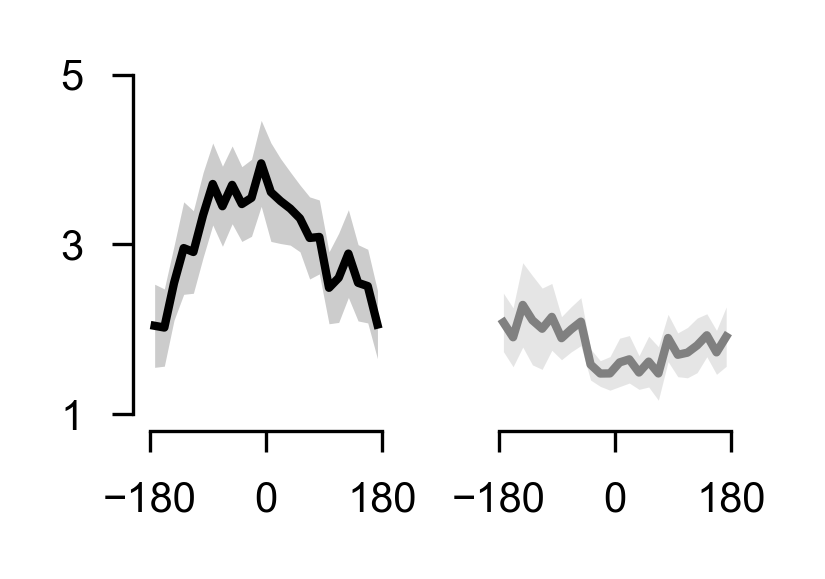

In [54]:
reload(fc2_stim)
fc2_stim.plot_dforw_vs_dist(dforw_mean_df,
                            save=save_figure,
                            savepath=FIGURE_PATH,
                           fname='ED_Fig_4k.pdf')

### Forward walking velcoity and distance to stimulation-defined goal heading plotted over time, parsed by forward walking behaviour before stimulation (ED Fig. 4j)

In [55]:
reload(fc2_stim)
target_heading_mean_df_standing=fc2_stim.get_dist_target_heading_standing_df(abf_trials_df)

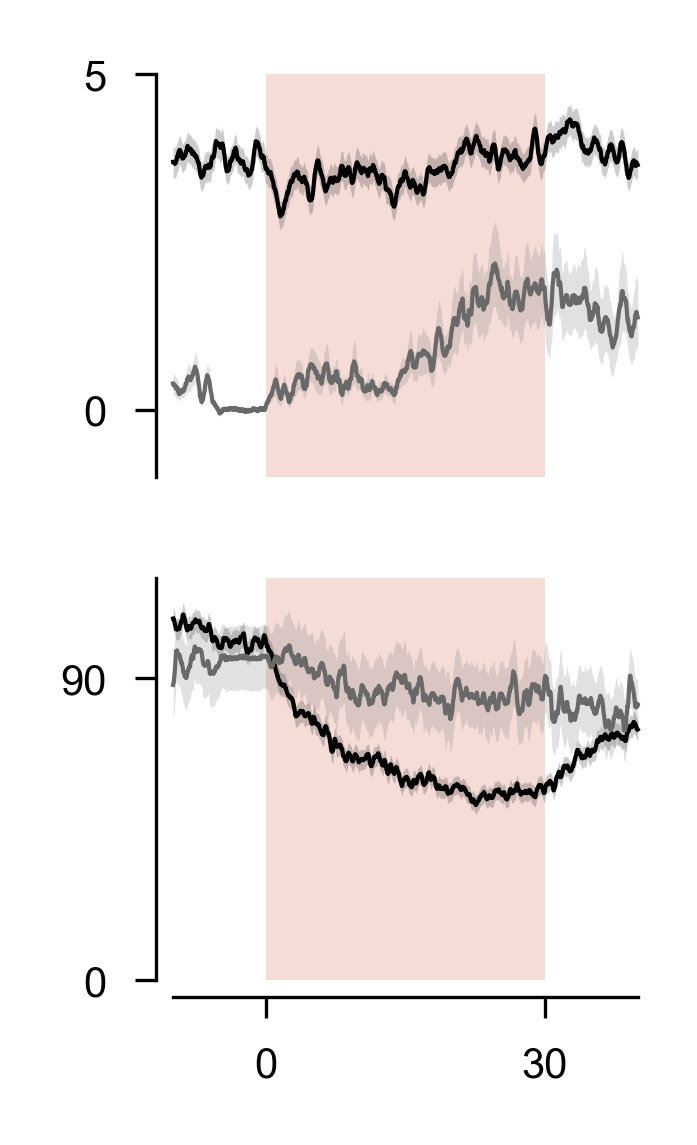

In [56]:
reload(fc2_stim)
fc2_stim.plot_dist_target_heading_standing(target_heading_mean_df_standing,
                                           save=save_figure,
                                           savepath=FIGURE_PATH,
                                          fname='ED_Fig_4j.pdf')

### Distance to stimulation-defined goal heading plotted over time, parsed by initial distance (ED Fig. 4i)

In [57]:
reload(fc2_stim)
target_heading_mean_df_dist=fc2_stim.get_dist_to_target_heading_df(abf_trials_df)

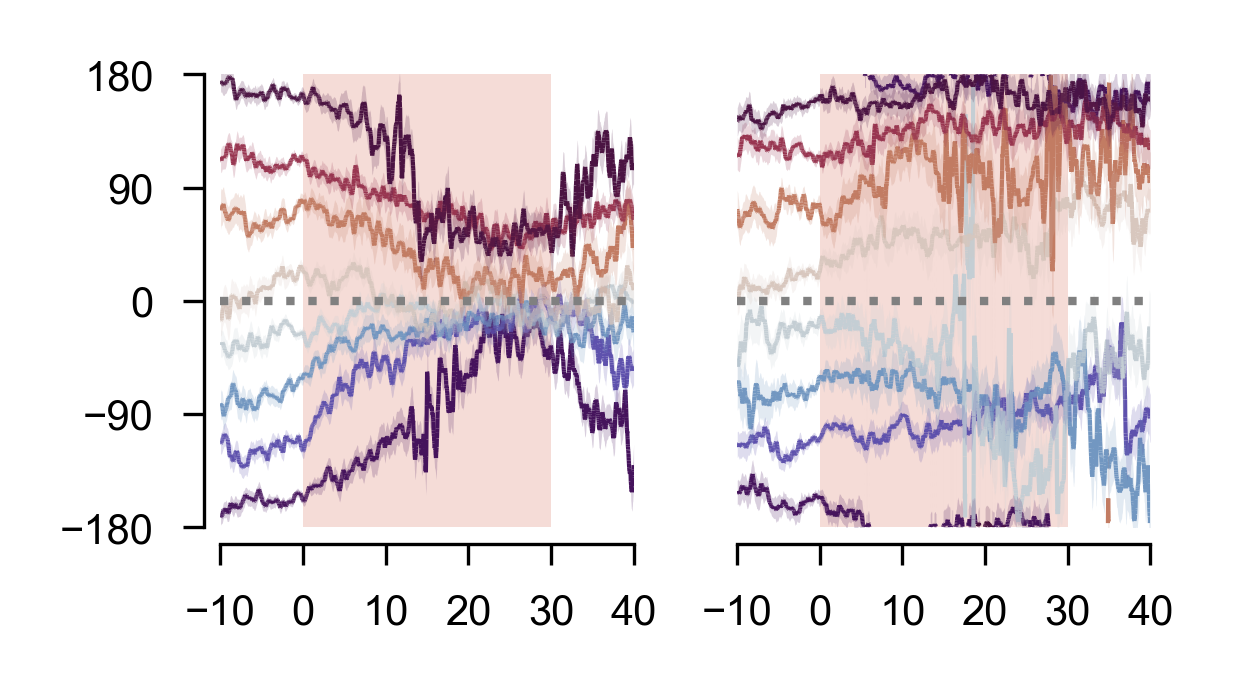

In [58]:
reload(fc2_stim)
fc2_stim.plot_dist_target_heading(target_heading_mean_df_dist,
                                  save=save_figure,
                                  savepath=FIGURE_PATH,
                                 fname='ED_Fig_4i.pdf')

# Save processed data

In [75]:
PROCESSED_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/shared_data/FC2_stimulation/'

reload(fc2_stim)
fc2_stim.save_processed_data(PROCESSED_DATA_PATH,genotypes)